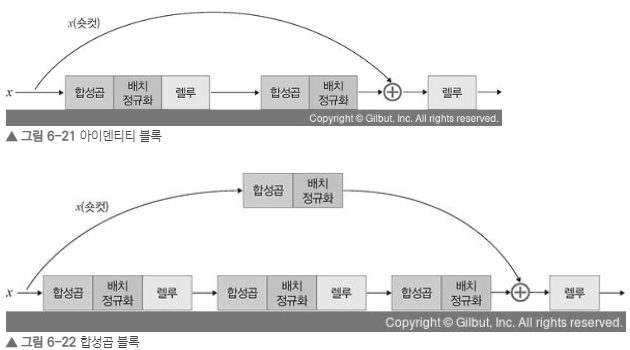

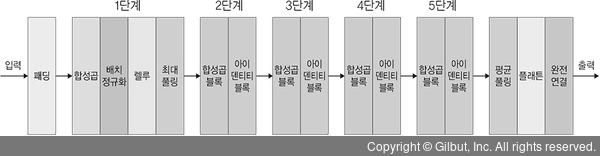

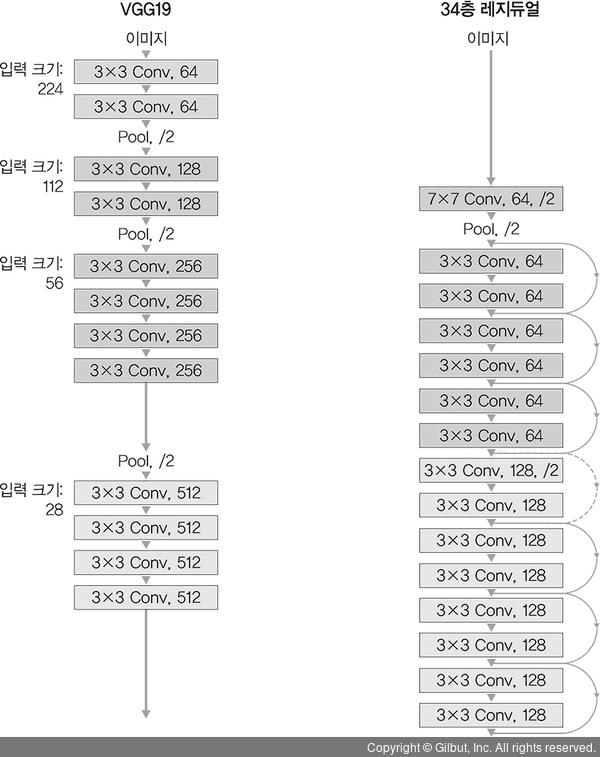

In [2]:
# 코드 6-14 필요한 라이브러리 호출
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 # 얼굴 인식, 물체 식별, 이미지 결합 등 작업이 가능한 오픈 소스 라이브러리

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

2024-12-03 01:36:42.290018: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:36:42.291945: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 01:36:42.297364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733157402.306634  104010 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733157402.309287  104010 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 01:36:42.319589: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [1]:
# 코드 6-19 아이덴티티 블록
def res_identity(x, filters):
    x_skip = x  # 레지듀얼 블록을 추가하는 데 사용
    f1, f2 = filters

    x = Conv2D(
        f1,
        kernel_size=(1, 1),
        strides=(1, 1),
        padding="valid",
        kernel_regularizer=l2(0.001),
    )(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)  # 첫 번째 블록

    x = Conv2D(
        f1,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.001),
    )(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)  # 두 번째 블록

    x = Conv2D(
        f2,
        kernel_size=(1, 1),
        strides=(1, 1),
        padding="valid",
        kernel_regularizer=l2(0.001),
    )(x)
    x = BatchNormalization()(x)  # 세 번째 블록

    x = Add()([x, x_skip])  # 숏컷
    x = Activation(activations.relu)(x)
    return x

In [3]:
# 코드 6-20 합성곱 블록
def res_conv(x, s, filters):
    x_skip = x
    f1, f2 = filters

    x = Conv2D(
        f1,
        kernel_size=(1, 1),
        strides=(s, s),
        padding="valid",
        kernel_regularizer=l2(0.001),
    )(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)  # 첫 번째 블록

    x = Conv2D(
        f1,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_regularizer=l2(0.001),
    )(x)
    x = BatchNormalization()(x)
    x = Activation(activations.relu)(x)  # 두 번째 블록

    x = Conv2D(
        f2,
        kernel_size=(1, 1),
        strides=(1, 1),
        padding="valid",
        kernel_regularizer=l2(0.001),
    )(x)
    x = BatchNormalization()(x)  # 세 번째 블록

    x_skip = Conv2D(
        f2,
        kernel_size=(1, 1),
        strides=(s, s),
        padding="valid",
        kernel_regularizer=l2(0.001),
    )(x_skip)
    x_skip = BatchNormalization()(x_skip)  # 숏컷

    x = Add()([x, x_skip])
    x = Activation(activations.relu)(x)
    return x